# DSGE Modelling with Python


In [1]:
import os, sys
import pandas as pd
import numpy as np

path = os.getcwd()
working_dir = os.path.abspath(os.path.join(os.getcwd(),"../../.."))
if working_dir.endswith("Framework"):
    sys.path.append(working_dir)
    os.chdir(working_dir)

#print the current work dir
print('Working directory: ',os.getcwd())

Working directory:  C:\work\Framework


Read model file and create model object.

In [2]:
from snowdrop.src import driver

# Path to model file
file_path = os.path.abspath(os.path.join(working_dir,'snowdrop/models/TOY/JLMP98.yaml'))
    
# Create model object
model = driver.importModel(fname=file_path,use_cache=True)


Monetary policy model example


Model:
------
name: "Monetary policy model example"
file: "c:\work\framework\snowdrop\models\TOY\JLMP98.yaml

Non-Linear Model

Transition Equations:
---------------------

 1 	 0.000 :  PDOT = p_pdot1*PDOT(+1) + (1-p_pdot1)*PDOT(-1) + p_pdot2*(g**2/(g-Y) - g) + p_pdot3*(g**2/(g-Y(-1)) - g)
 2 	 0.000 :  RR = RS - p_pdot1*PDOT(+1) - (1-p_pdot1)*PDOT(-1)
 3 	-0.000 :  RS = p_rs1*PDOT + Y + ers
 4 	 0.000 :  Y = p_y1*Y(-1) - p_y2*RR - p_y3*RR(-1) + ey





Set model parameters. Specify shocks and exogenous variables. Run simulations.

LBJ solver
Dense matrices algebra
Using CPU cores

Plotting Decomposition of Endogenous Variables


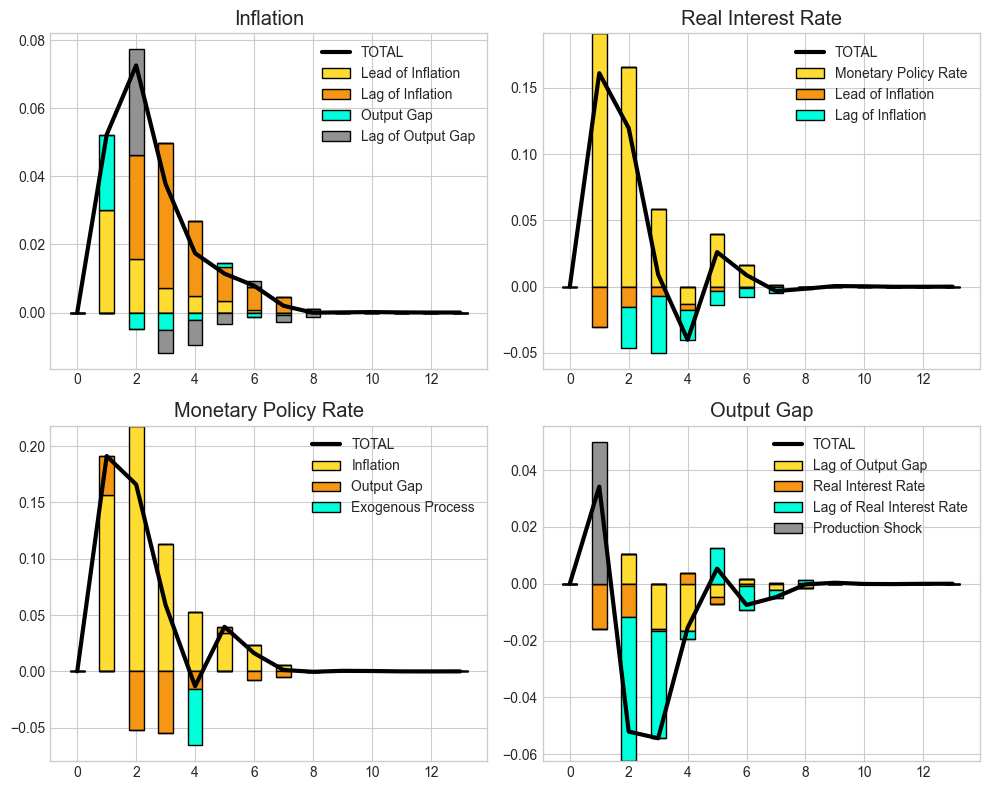

        PDOT        RR        RS         Y
0   0.000000  0.000000  0.000000  0.000000
1   0.052303  0.161053  0.191126  0.034217
2   0.072641  0.119589  0.165875 -0.052049
3   0.037769  0.009132  0.058919 -0.054389
4   0.017438 -0.040032 -0.013173 -0.015487
5   0.011417  0.026106  0.039595  0.005344
6   0.007900  0.008733  0.016245 -0.007455
7   0.001986 -0.003341  0.001269 -0.004690
8  -0.000045 -0.001536 -0.000356 -0.000223
9   0.000039  0.000462  0.000489  0.000371
10  0.000128  0.000288  0.000325 -0.000061
11  0.000034 -0.000070  0.000001 -0.000102
12 -0.000010 -0.000052 -0.000033 -0.000004
13 -0.000003  0.000011  0.000007  0.000014


In [3]:
# Model parameters
cal = {'g':0.049,'p_pdot1':0.414,'p_pdot2': 0.196,'p_pdot3': 0.276,
       'p_rs1':3,'p_y1':0.304,'p_y2':0.098,'p_y3':0.315}
model.calibration['parameters'] = list(cal.values())

# Shocks
model.options["periods"] = [1]
model.options["shock_values"] = [0.05]

# Exogenous variables. Revision of Monetary Policy Rate.
from snowdrop.src.utils.util import getExogenousSeries

exog_data = {'ers': pd.Series([0,0,0,-0.05,0],[1,2,3,4,5])}
#exog_data = {'ers': pd.Series([0]*5,[1,2,3,4,5])}
model.symbolic.exog_data = exog_data     
model.calibration["exogenous"] = getExogenousSeries(model)

# List of variables for which decomposition plots are produced
decomp = ['PDOT','RR','RS','Y']

# Function that runs simulations, model parameters estimation, MCMC sampling, etc...
y,rng_date = driver.run(model=model,decomp_variables=decomp,Output=False,Plot=True)
df = pd.DataFrame(y[:len(rng_date)],rng_date)
df.columns = model.symbols["variables"]
print(df)